In [ ]:
import os
import pandas as pd

# 输出文件名
output_file = "combined_data.csv"

# 获取当前目录下的所有CSV文件
csv_files = [file for file in os.listdir() if file.endswith('.csv')]

# 初始化一个空的 DataFrame
combined_df = pd.DataFrame()

# 逐个读取并合并 CSV 文件
for file in csv_files:
    print(f"Processing {file}...")
    # 读取当前文件
    df = pd.read_csv(file)
    
    # 合并到总的 DataFrame 中
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# 将合并后的数据保存到输出文件
combined_df.to_csv(output_file, index=False)
print(f"All files have been merged into {output_file}")

In [ ]:
import pandas as pd

# 读取原始数据
input_file = "combined_data.csv"
output_file = "yearly_summary.csv"

# 读取CSV文件
df = pd.read_csv(input_file)

# 提取年份并添加为新列
df['Year'] = df['Year_Month'].str[:4]

# 按年份汇总数据
yearly_summary = df.groupby('Year').agg({
    'Total_Tip_Amount': 'sum',
    'Total_Amount': 'sum',
    'Row_Count': 'sum'
}).reset_index()

# 保存汇总结果到新的CSV文件
yearly_summary.to_csv(output_file, index=False)

print(f"Yearly summary saved to {output_file}")


Yearly summary saved to yearly_summary.csv


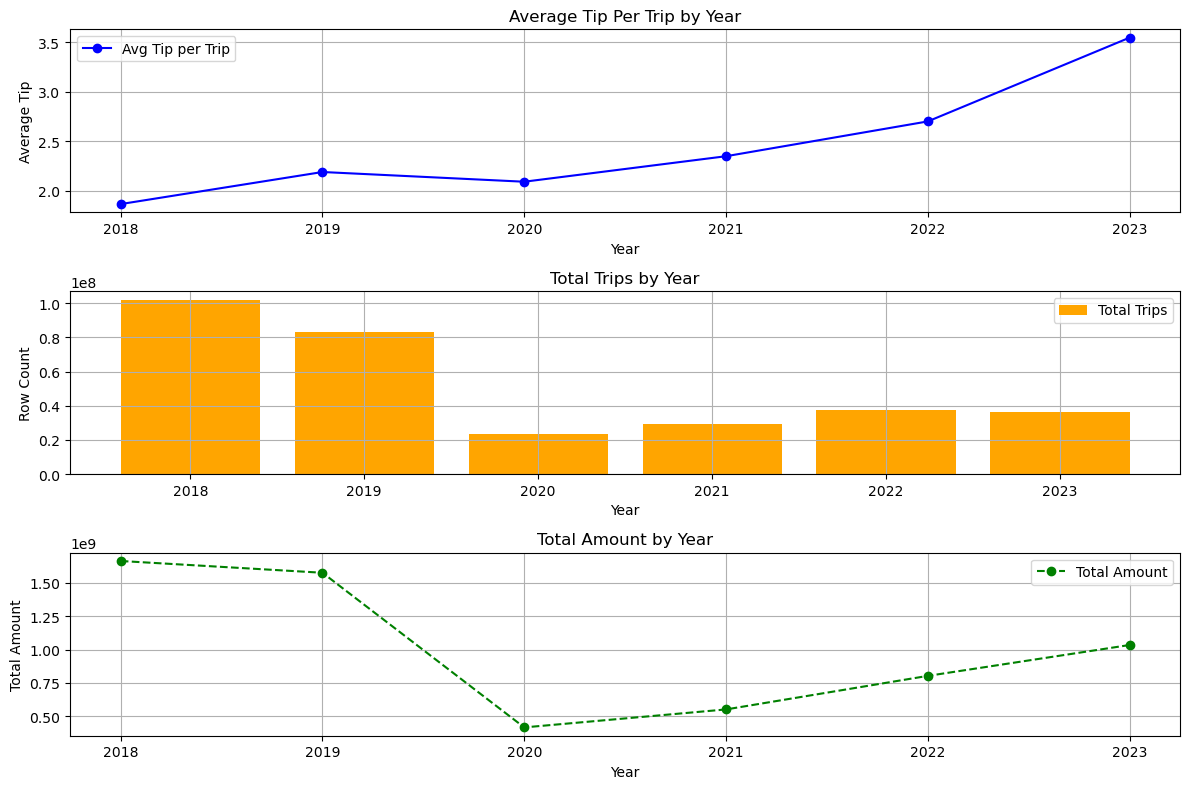

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("yearly_summary.csv")

# 计算每年的平均小费
df['Avg_Tip_Per_Trip'] = df['Total_Tip_Amount'] / df['Row_Count']

# 设置图形大小
plt.figure(figsize=(12, 8))

# 绘制每年的平均小费趋势
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['Avg_Tip_Per_Trip'], marker='o', label='Avg Tip per Trip', color='blue')
plt.title('Average Tip Per Trip by Year')
plt.xlabel('Year')
plt.ylabel('Average Tip')
plt.grid(True)
plt.legend()

# 绘制总单数变化趋势
plt.subplot(3, 1, 2)
plt.bar(df['Year'], df['Row_Count'], color='orange', label='Total Trips')
plt.title('Total Trips by Year')
plt.xlabel('Year')
plt.ylabel('Row Count')
plt.grid(True)
plt.legend()

# 绘制总金额变化趋势
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['Total_Amount'], marker='o', linestyle='--', color='green', label='Total Amount')
plt.title('Total Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.grid(True)
plt.legend()

# 调整布局
plt.tight_layout()
plt.show()
